In [ ]:
# Classification model using TF 2.0 to model the usefulness of gliomadf 
# Ref: https://stackabuse.com/tensorflow-2-0-solving-classification-and-regression-problems/
# Data files of gliomadf: https://archive.ics.uci.edu/dataset/759/glioma+grading+clinical+and+mutation+features+dataset
# Ref2 Book: Giancarlo Zaccone, Getting Started with TensorFlow-Packt Publishing (2016)
# Chapter 3 on Classifiers 
import pandas as pd
import numpy as np
# Ref for matplotlib: https://www.tutorialspoint.com/matplotlib/index.htm
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

In [3]:
gliomadf = pd.read_csv("TCGA_InfoWithGrade.csv")
print(gliomadf.columns)
print(gliomadf) # A DataFrame object

Index(['Grade', 'Gender', 'Age_at_diagnosis', 'Race', 'IDH1', 'TP53', 'ATRX',
       'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1',
       'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4',
       'PDGFRA'],
      dtype='object')
     Grade  Gender  Age_at_diagnosis  Race  IDH1  TP53  ATRX  PTEN  EGFR  CIC  \
0        0       0             51.30     0     1     0     0     0     0    0   
1        0       0             38.72     0     1     0     0     0     0    1   
2        0       0             35.17     0     1     1     1     0     0    0   
3        0       1             32.78     0     1     1     1     0     0    0   
4        0       0             31.51     0     1     1     1     0     0    0   
..     ...     ...               ...   ...   ...   ...   ...   ...   ...  ...   
834      1       1             77.89     0     0     0     0     1     0    0   
835      1       0             85.18     0     0     1     0     1     0    0   


In [ ]:
# Datal cols = ['Grade', 'Gender', 'Age_at_diagnosis', 'Race', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']

cols = ['Grade', 'Gender', 'Age_at_diagnosis', 'Race', 'IDH1', 'TP53', 'ATRX',
       'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1',
       'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4',
       'PDGFRA']

# # Import the CSV file to Panda's DataFrame format.
# gliomadf = pd.read_csv("TCGA_InfoWithGrade", names=cols, header=None)
# print(cols)
gliomadf # A DataFrame object

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.30,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38.72,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.17,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,32.78,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,31.51,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,1,1,77.89,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
835,1,0,85.18,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
836,1,1,77.49,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
837,1,0,63.33,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [5]:
gliomadf.drop_duplicates(inplace=True)
gliomadf.head()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.30,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38.72,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.17,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,32.78,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,31.51,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
plot_size = plt.rcParams["figure.figsize"]
plot_size [0] = 10 #8
plot_size [1] = 10 #6
plt.rcParams["figure.figsize"] = plot_size

<AxesSubplot:ylabel='Grade'>

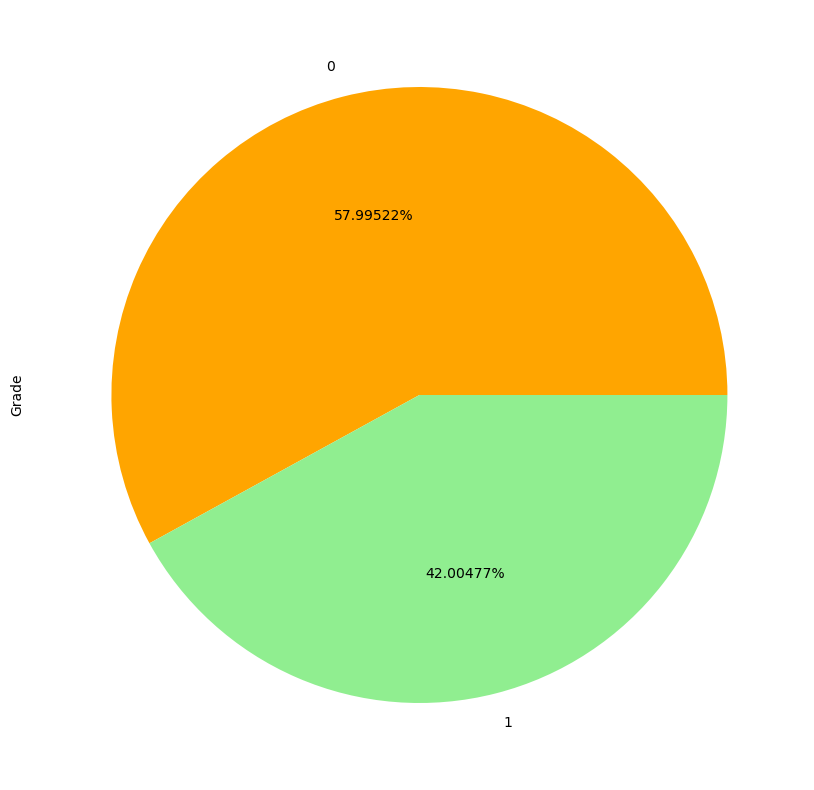

In [7]:
gliomadf.Grade.value_counts().plot(kind='pie', autopct='%0.05f%%', \
                                colors=['orange', 'lightgreen']) #, \
                                # explode=(0.05, 0.05, 0.05,0.05))

In [ ]:
for col in list(gliomadf):
  print(gliomadf[col].value_counts())

0    486
1    352
Name: Grade, dtype: int64
0    487
1    351
Name: Gender, dtype: int64
58.04    3
55.13    3
41.32    3
57.55    3
64.82    3
        ..
31.95    1
32.46    1
44.36    1
40.29    1
76.61    1
Name: Age_at_diagnosis, Length: 766, dtype: int64
0    764
1     59
2     14
3      1
Name: Race, dtype: int64
0    435
1    403
Name: IDH1, dtype: int64
0    491
1    347
Name: TP53, dtype: int64
0    622
1    216
Name: ATRX, dtype: int64
0    697
1    141
Name: PTEN, dtype: int64
0    726
1    112
Name: EGFR, dtype: int64
0    727
1    111
Name: CIC, dtype: int64
0    740
1     98
Name: MUC16, dtype: int64
0    765
1     73
Name: PIK3CA, dtype: int64
0    771
1     67
Name: NF1, dtype: int64
0    784
1     54
Name: PIK3R1, dtype: int64
0    793
1     45
Name: FUBP1, dtype: int64
0    798
1     40
Name: RB1, dtype: int64
0    800
1     38
Name: NOTCH1, dtype: int64
0    809
1     29
Name: BCOR, dtype: int64
0    811
1     27
Name: CSMD3, dtype: int64
0    811
1     27
Name: SMAR

In [ ]:
# Add column for percentage of mutations
gliomadf['Mutations'] = (gliomadf.loc[:, 'IDH1':'PDGFRA'].sum(axis=1) / 20) * 100
print(gliomadf['Mutations'].value_counts())

gliomadf.head()

15.0    251
10.0    224
5.0     176
20.0     93
0.0      67
25.0     20
30.0      3
85.0      2
65.0      1
45.0      1
Name: Mutations, dtype: int64


,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Mutations
0,0,0,51.30,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.0
1,0,0,38.72,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10.0
2,0,0,35.17,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,15.0
3,0,1,32.78,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,30.0
4,0,0,31.51,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,15.0


In [ ]:
# Normalise Age and percentage of Mutation columns
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
gliomadf[['Age_at_diagnosis']]=sc.fit_transform(gliomadf[['Age_at_diagnosis']])
gliomadf[['Mutations']]=sc.fit_transform(gliomadf[['Mutations']])
gliomadf.head()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Mutations
0,0,0,0.022035,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.475661
1,0,0,-0.779602,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,-0.198796
2,0,0,-1.005819,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.475661
3,0,1,-1.158117,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,2.499031
4,0,0,-1.239046,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.475661


In [11]:
X = gliomadf[['Gender', 'Age_at_diagnosis', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1',
       'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA', 'Mutations']]
print(X.shape)
X

(838, 23)


,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,...,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Mutations
0,0,0.022035,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.475661
1,0,-0.779602,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,-0.198796
2,0,-1.005819,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.475661
3,1,-1.158117,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,2.499031
4,0,-1.239046,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.475661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,1,1.716432,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.873252
835,0,2.180974,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.198796
836,1,1.690943,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.198796
837,0,0.788624,0,1,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,1.150117


In [12]:
labels = gliomadf['Grade']
labels.value_counts()

0    486
1    352
Name: Grade, dtype: int64

In [13]:
y = labels.values
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 

In [ ]:
from sklearn.model_selection import train_test_split

print(X.shape)
print(y.shape)

# random_state is a seed. It can be any value. If we keep it same on every
# run, then there will be repeatability in the results.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, 
                                                    random_state=40)
print('Shape of X_train and X_test:', X_train.shape, X_test.shape)
print('Shape of y_train and y_test:', y_train.shape, y_test.shape)

(838, 23)
(838,)
Shape of X_train and X_test: (645, 23) (193, 23)
Shape of y_train and y_test: (645,) (193,)


In [ ]:
# Define the number of nodes in each layer of the network
DENSE1_SIZE = 22
DENSE2_SIZE = 16
DENSE3_SIZE = 8
NUM_OF_EPOCHS = 100 
BATCH_SIZE = 12

In [ ]:
model = tf.keras.Sequential()
# gliomadf_dataset:
input_shape = X.shape[1]
print(input_shape)
model.add(tf.keras.layers.Flatten(input_shape =(input_shape,)))
# if DENSE1_SIZE = 22, total no. of params: 22*23 weights = 506 + 22 biases = 528
model.add(tf.keras.layers.Dense(DENSE1_SIZE, activation='relu'))
model.add(tf.keras.layers.Dense(DENSE2_SIZE, activation='relu'))
model.add(tf.keras.layers.Dense(DENSE3_SIZE, activation='relu'))
# Output labels: 0 / 1
# So, no. of output categories = 1 (LGG or GBM)

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Adam: Adaptive Moment Estimator (a stochastic optimization algorithm)
# Which maintains per parameter leraning rate (LR) using momemnts (rate of change of LR)
# Useful in the system where the classification features are more and noisy
# Ref: https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
# Crossentropy loss fn is used when there are two or more label classes.
# The labels are expected to be provided in a one_hot representation.
# One hot encoding: It represents categorical variables as binary vectors.
# To represent a particular label, mark it as 1 and all other labels as zeros
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

23


In [17]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 23)                0         
                                                                 
 dense (Dense)               (None, 22)                528       
                                                                 
 dense_1 (Dense)             (None, 16)                368       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,041
Trainable params: 1,041
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, 
                    epochs=NUM_OF_EPOCHS,
                    verbose=1, validation_split=0.22)

Epoch 1/100
42/42 [==============================] - 2s 20ms/step - loss: 0.7226 - acc: 0.4493 - val_loss: 0.6775 - val_acc: 0.6479
Epoch 2/100
42/42 [==============================] - 0s 5ms/step - loss: 0.6271 - acc: 0.7416 - val_loss: 0.5833 - val_acc: 0.8451
Epoch 3/100
42/42 [==============================] - 0s 4ms/step - loss: 0.5136 - acc: 0.8330 - val_loss: 0.4311 - val_acc: 0.8592
Epoch 4/100
42/42 [==============================] - 0s 4ms/step - loss: 0.3996 - acc: 0.8489 - val_loss: 0.3622 - val_acc: 0.8662
Epoch 5/100
42/42 [==============================] - 0s 5ms/step - loss: 0.3636 - acc: 0.8588 - val_loss: 0.3540 - val_acc: 0.8732
Epoch 6/100
42/42 [==============================] - 0s 3ms/step - loss: 0.3501 - acc: 0.8648 - val_loss: 0.3492 - val_acc: 0.8803
Epoch 7/100
42/42 [==============================] - 0s 3ms/step - loss: 0.3405 - acc: 0.8668 - val_loss: 0.3507 - val_acc: 0.8803
Epoch 8/100
42/42 [==============================] - 0s 3ms/step - loss: 0.3308 - 

In [19]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

7/7 [==============================] - 0s 2ms/step - loss: 0.3833 - acc: 0.8912
Test Score: 0.3832702934741974
Test Accuracy: 0.8911917209625244


In [ ]:
# Trying out saving the model in h5 file format
# Ref: https://www.tensorflow.org/tutorials/keras/save_and_load
# We have the model object that needs to be saved
# It save text file with Hex numbers in HDF5 format in the current dir
model.save('gliomadfClassifyModel.h5')

In [21]:
def representative_dataset():
    for _ in range(100):
      data =  X_test
      yield [data.astype(np.float32)]
        
print(representative_dataset())

<generator object representative_dataset at 0x0000023AC90F72C8>


In [ ]:
# Converting a tf.Keras model to a TensorFlow Lite model.
# It is preferred to use TFLiteConverter from saved model and then
# Also provide representative dataset to train the converted TFLite model
# Avoid calling the TFLite converter directly from model
#converter = tf.lite.TFLiteConverter.from_keras_model(model)

tf.saved_model.save(model, "saved_gliomadf_seq_model_keras_dir")
converter = tf.lite.TFLiteConverter.from_saved_model("saved_gliomadf_seq_model_keras_dir")

# Though its size is not much, optimizer is used here to check whether it works on ESP32
# if this is chosen, tf.lite.Optimize.OPTIMIZE_FOR_SIZE, the TFLite does not work on ESP32
# Observed that even with Optimize.DEFAULT the TFLite model does not work on ESP32

# converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset

tflite_model = converter.convert()

INFO:tensorflow:Assets written to: saved_gliomadf_seq_model_keras_dir\assets


In [ ]:
# Save the model in TFlite format
# It brings down the size
with open('gliomadfClassifyModel.tflite', 'wb') as f:
  f.write(tflite_model)

In [24]:
# Run the inference on TFLITE model on Python ... here itself first
# Let us now first try to run this tflinte model on Python itself
# Ref: https://www.tensorflow.org/lite/guide/inference
# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="gliomadfClassifyModel.tflite")
interpreter.allocate_tensors()

In [25]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print('input_details:\n', input_details)
print('output_details:\n', output_details)

input_details:
 [{'name': 'serving_default_flatten_input:0', 'index': 0, 'shape': array([ 1, 23]), 'shape_signature': array([-1, 23]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
output_details:
 [{'name': 'StatefulPartitionedCall:0', 'index': 17, 'shape': array([1, 1]), 'shape_signature': array([-1,  1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [ ]:
for i in X.iloc[100]:
    print(i, end=' ,') # end = "f, "
print("\n", y[100])

0.0 ,-1.2084587209146778 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,-0.8732522345187961 ,
 0


In [27]:
for i in X.iloc[700]:
    print(i,",", end='')
print("\n", y[700])

0.0 ,-0.12325404319333862 ,0.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,-0.8732522345187961 ,
 1


In [32]:
for i in X.iloc[419]:
    print(i,",", end='')
print("\n", y[450])

0.0 ,-0.05060969013389534 ,1.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,-0.19879566997801162 ,
 0


In [36]:
for i in X.iloc[723]:
    print(i,",", end='')
print("\n", y[723])

0.0 ,-0.6349506704453851 ,1.0 ,1.0 ,1.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,1.1501174591035572 ,
 1


In [ ]:
# Test the model on random input data.
input_shape = input_details[0]['shape']
#print(input_shape)
#print(type(X_test))
#print(X_test.iloc[1])
#print(X_test.iloc[0])
input0_data = np.random.random_sample(input_shape)
print("Input 0:", input0_data)
input0_data = np.array(input0_data, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input0_data)

interpreter.invoke()
# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output0_data = interpreter.get_tensor(output_details[0]['index'])
print(output0_data)

# Verify if the same data is given to the original model what is the output
output0_data = model.predict(input0_data)
print("Predicted Output:", output0_data)

# ['Gender', 'Age_at_diagnosis', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA', 'Mutations']

input1_data = [[0.0 ,-1.2084587209146778 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,-0.8732522345187961]]
print("\nInput 1: ", input1_data)
input1_data = np.array(input1_data, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input1_data)

interpreter.invoke()
# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output1_data = interpreter.get_tensor(output_details[0]['index'])
print('output1:')
print(output1_data)

# Verify if the same data is given to the original model what is the output
output1_data = model.predict(input1_data)
print("Predicted Output: ", output1_data)
print("Actual Output: 0")

input2_data = [[0.0 ,-0.12325404319333862 ,0.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,-0.8732522345187961]]
print("\nInput 2:", input2_data)
input2_data = np.array(input2_data, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], tf.Variable(input2_data))

interpreter.invoke()
# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output2_data = interpreter.get_tensor(output_details[0]['index'])
print('output2:')
print(output2_data)

# Verify if the same data is given to the original model what is the output
output2_data = model.predict(input2_data)
print("Predicted output:", output2_data)
print("Actual Output: 1")

input3_data = [[0.0 ,-0.05060969013389534 ,1.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,-0.19879566997801162]]
print("\nInput 3:", input3_data)
input3_data = np.array(input3_data, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], tf.Variable(input3_data))
interpreter.invoke()
# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output3_data = interpreter.get_tensor(output_details[0]['index'])
print('output3:')
print(output3_data)
# Verify if the same data is given to the original model what is the output
output3_data = model.predict(input3_data)
print("Predicted output:", output3_data)
print("Actual Output: 0")

input4_data = [[0.0 ,-0.6349506704453851 ,1.0 ,1.0 ,1.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,1.1501174591035572]]
print("\nInput 4:", input4_data)
input4_data = np.array(input4_data, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], tf.Variable(input4_data))
interpreter.invoke()
# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output4_data = interpreter.get_tensor(output_details[0]['index'])
print('output4:')
print(output4_data)
# Verify if the same data is given to the original model what is the output
output4_data = model.predict(input4_data)
print("Predicted output:", output4_data)
print("Actual Output: 1")

Input 0: [[0.41098578 0.73898537 0.93060314 0.92521167 0.38272335 0.91869346
  0.27074674 0.5141972  0.43973506 0.82816205 0.72879192 0.40905345
  0.39025372 0.64311485 0.59437164 0.10380482 0.42071384 0.99527167
  0.73679525 0.08481944 0.01149438 0.50213834 0.80509158]]
[[0.]]
1/1 [==============================] - 0s 23ms/step
Predicted Output: [[1.8291357e-06]]

Input 1:  [[0.0, -1.2084587209146778, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.8732522345187961]]
output1:
[[0.]]
1/1 [==============================] - 0s 23ms/step
Predicted Output:  [[0.00073058]]
Actual Output: 0

Input 2: [[0.0, -0.12325404319333862, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.8732522345187961]]
output2:
[[0.921875]]
1/1 [==============================] - 0s 23ms/step
Predicted output: [[0.91274124]]
Actual Output: 1

Input 3: [[0.0, -0.05060969013389534, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0,

In [ ]:
# Function to convert some hex values into an array for C programming
import time, sys

# Function to convert some hex values into an array for C programming
def hex_to_c_array(hex_data, var_name):
    c_str = ""

    # Create header guard
    c_str += '#ifndef ' + var_name.upper() + '_H\n'
    c_str += "#define " + var_name.upper() + '_H\n\n'

    # c_str += "/*\n Reference from Prof. Mouli Sankaran \n"
    c_str += "/*\n CAUTION: This is an auto generated file.\n DO NOT EDIT OR MAKE ANY CHANGES TO IT.\n"

# Time stamping of this model data in the generated file
    localtime = time.asctime( time.localtime(time.time()) )
    c_str += " This model data was generated on " + localtime+ '\n\n'
    print("This model data was generated on:", localtime)

# Add information about the verisons of tools and packages used in generating this header file
    c_str += " Tools used:\n Python:" + str(sys.version) + "\n Numpy:" + str(np.version.version) + \
          "\n TensorFlow:" + str(sys.version) + "\n Keras: "+ str(tf.keras.__version__) + "\n\n"
    print("Tools used: Python:", sys.version, "\n Numpy:", np.version.version, \
          "\n TensorFlow:", sys.version, "\n Keras: ", tf.keras.__version__, "\n\n")

# Training details of the model
    c_str += ' Model details are:\n'
    c_str += ' NUM_OF_EPOCHS = ' + str(NUM_OF_EPOCHS) + '\n'
    c_str += ' BATCH_SIZE    = ' + str(BATCH_SIZE) + '\n*/\n'
    
# Generate 'C' constants for the no. of nodes in each layer
    c_str += '\nconst int ' + 'DENSE1_SIZE' + ' = ' + str(DENSE1_SIZE) + ';\n'
    c_str +=   'const int ' + 'DENSE2_SIZE' + ' = ' + str(DENSE2_SIZE) + ';\n'     
    c_str +=   'const int ' + 'DENSE3_SIZE' + ' = ' + str(DENSE3_SIZE) + ';\n' 
    
    # Add array length at the top of the file
    c_str += '\nconst unsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

    # Declare C variable
    c_str += 'alignas(8) const unsigned char ' + var_name + '[] = {'
    hex_array = []
    for i, val in enumerate(hex_data):
        # Construct string from hex
        hex_str = format(val, '#04x')

        # Add formating so each line stays within 80 characters
        if (i + 1) < len(hex_data):
          hex_str += ','
        if (i + 1) % 12 == 0:
          hex_str += '\n'
        hex_array.append(hex_str)

    # Add closing brace
    c_str += '\n' + format(''.join(hex_array)) + '\n};\n\n'

    # Close out header guard
    c_str += '#endif //' + var_name.upper() + '_H'

    return c_str

In [35]:
# Write TFLite model to a C source (or header) file
with open("gliomadf_model_esp32" + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, "gliomadf_model_esp32"))

This model data was generated on: Tue Nov  5 10:50:07 2024
Tools used: Python: 3.7.16 (default, Jan 17 2023, 16:06:28) [MSC v.1916 64 bit (AMD64)] 
 Numpy: 1.21.5 
 TensorFlow: 3.7.16 (default, Jan 17 2023, 16:06:28) [MSC v.1916 64 bit (AMD64)] 
 Keras:  2.10.0 


